In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[0,1.0],[2.0,0],[1.0,1.0]])
y = torch.tensor([-1,-1,1])

In [3]:
xx = np.linspace(0,2,100)

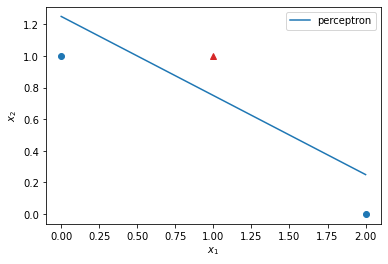

In [4]:
plt.figure()
plt.plot(x[0][0],x[0][1],'o',color="tab:blue")
plt.plot(x[1][0],x[1][1],'o',color="tab:blue")
plt.plot(x[2][0],x[2][1],'^',color="tab:red")

plt.plot(xx,1.25-0.5*xx,label='perceptron')

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.legend(loc=1)

plt.show()

# Training a perceptron

The perceptron learning algorithm is $w_i(t+1) = w_i(t) \; \boldsymbol{+} \; r\cdot(d_j - y_j(t)) x_{j,i}$ ("cells that fire together, wire together").

$r\dots\text{is the learning rate of the perceptron}$

$\mathbf{x}_j\dots\text{is the n-dimensional input vector}$

$y_j\dots\text{output associated with }\mathbf{x}_j$

$d_j\dots\text{is the desired output value of the perceptron for that input}$

$w_i(t)\dots\text{is the ith value in the ``weight vector'' at iteration } t$

We first create a perceptron class in pytorch.

In [5]:
class perceptron(nn.Module):
    
    def __init__(self):

        self.weights = torch.tensor([-0.5,0,1])
    
    def forward(self,x,sgn=False):
        
        if sgn == False:
            return torch.add(self.weights[0],torch.dot(self.weights[1:],x))
        else:
            return torch.sgn(torch.add(self.weights[0],torch.dot(self.weights[1:],x)))

The training function can be implemented as follows.

In [6]:
 def training(weights,
                 r,
                 x,
                 y,
                 d):
        
        weights[0] += r*(d-y)
        weights[1:] += r*(d-y)*x

In [8]:
perc = perceptron()

Perceptron weights before training.

In [10]:
perc.weights

tensor([-0.5000,  0.0000,  1.0000])

In [11]:
perc.forward(x[0])

tensor(0.5000)

In [12]:
weights_training=[]
loss = []

for i in range(2000):

    training(perc.weights,r=0.1,x=x[i%3],y=perc.forward(x[i%3]),d=y[i%3])
    weights_training.append(np.copy(perc.weights.numpy()))
    loss.append(1/3*((perc.forward(x[0])+1)**2+(perc.forward(x[1])+1)**2+(perc.forward(x[2])-1)**2))

In [13]:
perc.forward(x[0])

tensor(-0.9937)

In [14]:
perc.forward(x[1])

tensor(-0.9976)

In [15]:
perc.forward(x[2])

tensor(0.9894)

We now plot the weight evolution.

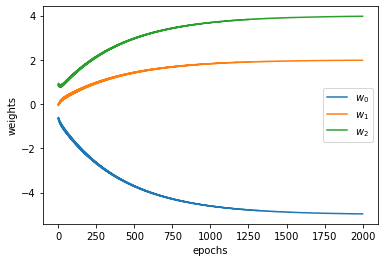

In [16]:
plt.figure()
plt.plot([weights_training[i][0] for i in range(len(weights_training))],label=r"$w_0$")
plt.plot([weights_training[i][1] for i in range(len(weights_training))],label=r"$w_1$")
plt.plot([weights_training[i][2] for i in range(len(weights_training))],label=r"$w_2$")
plt.xlabel(r"epochs")
plt.ylabel(r"weights")
plt.legend(loc=5)
plt.show()

The loss evolution is shown in the plot below.

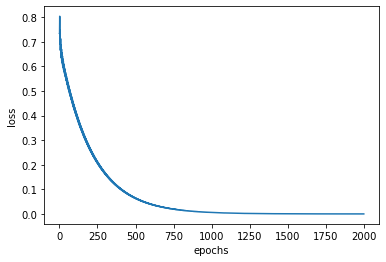

In [17]:
plt.figure()
plt.plot(loss)
plt.xlabel(r"epochs")
plt.ylabel(r"loss")
plt.show()

We now repeat the same exercise with a sgn activation function.

In [18]:
perc = perceptron()

In [19]:
weights_training=[]
loss = []

for i in range(10):

    training(perc.weights,r=0.1,x=x[i%3],y=perc.forward(x[i%3],sgn=True),d=y[i%3])
    weights_training.append(np.copy(perc.weights.numpy()))
    loss.append(1/3*((perc.forward(x[0],sgn=True)+1)**2+(perc.forward(x[1],sgn=True)+1)**2+(perc.forward(x[2],sgn=True)-1)**2))

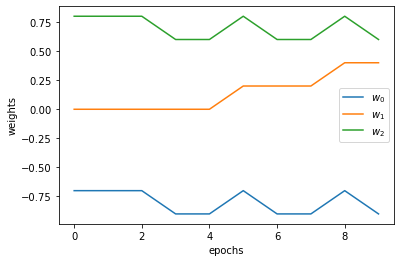

In [20]:
plt.figure()
plt.plot([weights_training[i][0] for i in range(len(weights_training))],label=r"$w_0$")
plt.plot([weights_training[i][1] for i in range(len(weights_training))],label=r"$w_1$")
plt.plot([weights_training[i][2] for i in range(len(weights_training))],label=r"$w_2$")
plt.xlabel(r"epochs")
plt.ylabel(r"weights")
plt.legend(loc=5)
plt.show()

In [21]:
plt.figure()
plt.plot(loss)
plt.xlabel(r"epochs")
plt.ylabel(r"loss")
plt.show()

Using an appropriate activation function can improve convergence a lot!